# Assignment: Центральная предельная теорема своими руками

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

Для нескольких значений `n` (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. 

**Обратите внимание:** для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Решение должно представлять собой IPython-ноутбук, содержащий:

* код, генерирующий выборки и графики;
* краткие описания каждого блока кода, объясняющие, что он делает;
* необходимые графики (убедитесь, что на них подписаны оси);
* выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
* выводы по результатам выполнения задания.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import cauchy, norm, gamma, beta

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
mu = 0
sigma = 1
a = 4
b = 4

norm_rv = norm(loc=mu, scale=sigma)
cauchy_rv = cauchy()
gamma_rv = gamma(a)
beta_rv = beta(a, b)

norm_values = norm_rv.rvs(size=1000)
cauchy_values = cauchy_rv.rvs(size=1000)
gamma_values = gamma_rv.rvs(size=1000)
beta_values = beta_rv.rvs(size=1000)

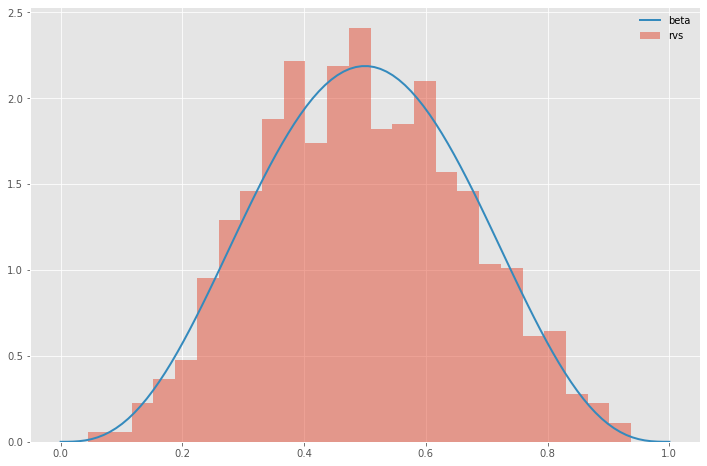

In [3]:
plt.hist(
    beta_values, 
    bins=25, 
    density=True, 
    label='rvs',
    alpha=0.5
)
plt.plot(
    np.linspace(0, 1, 100), 
    beta_rv.pdf(np.linspace(0, 1, 100)), 
    label='beta',
    lw=2,
)
plt.legend(frameon=False, loc='best')
plt.show()

In [4]:
def sample_generator(sample_size, sample_amount, random_variable):
    container = []
    sample_count = 0
    while sample_count < sample_amount:
        sample_count += 1
        container.append(random_variable.rvs(size=sample_size).mean())
    return np.array(container)

In [5]:
E = a / (a + b)
var = a * b / (a + b) ** 2 * (a + b + 1)
print ('Математическое ожидание:', E)
print ('Дисперсия:', var)

Математическое ожидание: 0.5
Дисперсия: 2.25


In [6]:
for n in range(5, 51, 5):
    sample = sample_generator(
        sample_size=n, 
        sample_amount=1000,
        random_variable=beta_rv,
    )
    print (f'Размер семпла: {n}\n Математическое ожидание: {round(sample.mean(), 4)}\n Дисперсия: {round(sample.var(), 4)}')
    print ('=' * 100)

Размер семпла: 5
 Математическое ожидание: 0.4979
 Дисперсия: 0.006
Размер семпла: 10
 Математическое ожидание: 0.5025
 Дисперсия: 0.0027
Размер семпла: 15
 Математическое ожидание: 0.4985
 Дисперсия: 0.0019
Размер семпла: 20
 Математическое ожидание: 0.4991
 Дисперсия: 0.0013
Размер семпла: 25
 Математическое ожидание: 0.5006
 Дисперсия: 0.0011
Размер семпла: 30
 Математическое ожидание: 0.5003
 Дисперсия: 0.001
Размер семпла: 35
 Математическое ожидание: 0.5002
 Дисперсия: 0.0008
Размер семпла: 40
 Математическое ожидание: 0.5003
 Дисперсия: 0.0007
Размер семпла: 45
 Математическое ожидание: 0.5007
 Дисперсия: 0.0006
Размер семпла: 50
 Математическое ожидание: 0.4999
 Дисперсия: 0.0006


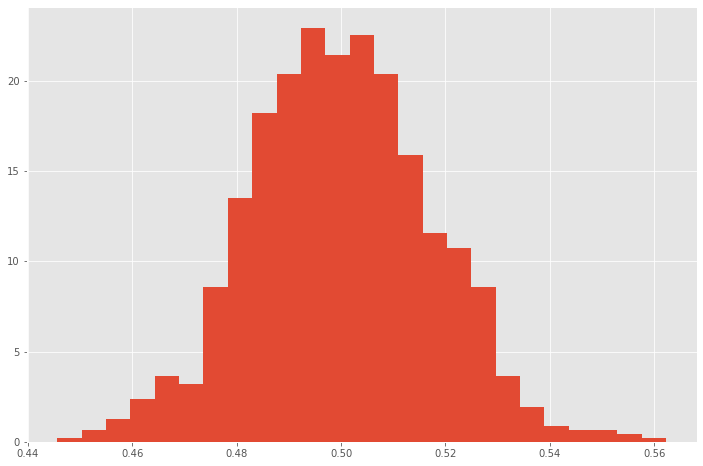

In [7]:
plt.hist(
    sample_generator(100, 1000, beta_rv), 
    bins=25, 
    density=True,
)
plt.show()